In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import IPython
import IPython.display

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')

from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
raw_data = pd.read_csv('delanteros.csv', sep=';',encoding='latin-1')
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['Tiros'])
raw_data = raw_data.dropna(subset = ['Tiros a puerta'])

# filtering out the last 2 columns
raw_data = raw_data[['Nombre','Fecha','Jornadas','Titular','Minutos','Goles','Asistencias','Tiros','Tiros a puerta']]

forecast_data = raw_data

forecast_data = forecast_data[~forecast_data['Nombre'].isin(['Lucas Boyé', 'Luis Javier Suárez', 'Alexander Isak', 'Rafa Mir'])]

# Limiting the columns we need
forecast_data = forecast_data[['Nombre','Jornadas','Goles']]

#Original Data
original = forecast_data[forecast_data['Nombre'] == 'Karim Benzema']
original1 = original[['Jornadas', 'Goles']]

####################################################################
original2 = forecast_data[forecast_data['Nombre'] == 'Luis Suárez']
original_2 = original2[['Jornadas', 'Goles']]
####################################################################
original3 = forecast_data[forecast_data['Nombre'] == 'Joselu']
original_3 = original3[['Jornadas', 'Goles']]
####################################################################
original4 = forecast_data[forecast_data['Nombre'] == 'Iñaki Williams']
original_4 = original4[['Jornadas', 'Goles']]
####################################################################
original5 = forecast_data[forecast_data['Nombre'] == 'Memphis Depay']
original_5 = original5[['Jornadas', 'Goles']]
####################################################################
original6 = forecast_data[forecast_data['Nombre'] == 'Juanmi']
original_6 = original6[['Jornadas', 'Goles']]
####################################################################
original7 = forecast_data[forecast_data['Nombre'] == 'Iago Aspas']
original_7 = original7[['Jornadas', 'Goles']]
####################################################################
original8 = forecast_data[forecast_data['Nombre'] == 'Santi Mina']
original_8 = original8[['Jornadas', 'Goles']]
####################################################################
original9 = forecast_data[forecast_data['Nombre'] == 'Álvaro Negredo']
original_9 = original9[['Jornadas', 'Goles']]
####################################################################
original10 = forecast_data[forecast_data['Nombre'] == 'Raúl de Tomás']
original_10 = original10[['Jornadas', 'Goles']]
####################################################################
original11 = forecast_data[forecast_data['Nombre'] == 'Enes Ünal']
original_11 = original11[['Jornadas', 'Goles']]
####################################################################
original12 = forecast_data[forecast_data['Nombre'] == 'Roger Martí']
original_12 = original12[['Jornadas', 'Goles']]
####################################################################
original13 = forecast_data[forecast_data['Nombre'] == 'Suso']
original_13 = original13[['Jornadas', 'Goles']]
####################################################################
original14 = forecast_data[forecast_data['Nombre'] == 'Maxi Gómez']
original_14 = original14[['Jornadas', 'Goles']]

In [3]:
# set the Jornada into index
original1.set_index('Jornadas', inplace=True)
original1

,Goles
Jornadas,
1,0
2,2
3,2
4,0
5,0
...,...
114,0
115,1
116,0


In [4]:
# set the Jornada into index
original_2.set_index('Jornadas', inplace=True)
original_2

,Goles
Jornadas,
1,0
2,0
3,2
4,1
5,0
...,...
101,1
102,2
103,0


In [5]:
# set the Jornada into index
original_3.set_index('Jornadas', inplace=True)
# set the Jornada into index
original_4.set_index('Jornadas', inplace=True)
# set the Jornada into index
original_5.set_index('Jornadas', inplace=True)
# set the Jornada into index
original_6.set_index('Jornadas', inplace=True)
# set the Jornada into index
original_7.set_index('Jornadas', inplace=True)
# set the Jornada into index
original_8.set_index('Jornadas', inplace=True)
original_9.set_index('Jornadas', inplace=True)
# set the Jornada into index
original_10.set_index('Jornadas', inplace=True)
# set the Jornada into index
original_11.set_index('Jornadas', inplace=True)
original_12.set_index('Jornadas', inplace=True)
original_13.set_index('Jornadas', inplace=True)
original_14.set_index('Jornadas', inplace=True)

In [6]:
original1_df1 = original1.diff(periods=1)
original1_df1.dropna(inplace=True)
####################################################################
original2_df2 = original_2.diff(periods=1)
original2_df2.dropna(inplace=True)
####################################################################
original3_df3 = original_3.diff(periods=1)
original3_df3.dropna(inplace=True)
####################################################################
original4_df4 = original_4.diff(periods=1)
original4_df4.dropna(inplace=True)
####################################################################
original5_df5 = original_5.diff(periods=1)
original5_df5.dropna(inplace=True)
####################################################################
original6_df6 = original_6.diff(periods=1)
original6_df6.dropna(inplace=True)
####################################################################
original7_df7 = original_7.diff(periods=1)
original7_df7.dropna(inplace=True)
####################################################################
original8_df8 = original_8.diff(periods=1)
original8_df8.dropna(inplace=True)
####################################################################
original9_df9 = original_9.diff(periods=1)
original9_df9.dropna(inplace=True)
####################################################################
original10_df10 = original_10.diff(periods=1)
original10_df10.dropna(inplace=True)
####################################################################
original11_df11 = original_11.diff(periods=1)
original11_df11.dropna(inplace=True)
####################################################################
original12_df12 = original_12.diff(periods=1)
original12_df12.dropna(inplace=True)
####################################################################
original13_df13 = original_13.diff(periods=1)
original13_df13.dropna(inplace=True)
####################################################################
original14_df14 = original_14.diff(periods=1)
original14_df14.dropna(inplace=True)

In [7]:
column_indices = {name: i for i, name in enumerate(original1_df1.columns)}

n = len(original1_df1)
train_df = original1_df1[0:int(n*0.7)]
val_df = original1_df1[int(n*0.7):int(n*0.9)]
test_df = original1_df1[int(n*0.9):]
####################################################################

n2 = len(original2_df2)
train_df2 = original2_df2[0:int(n2*0.7)]
val_df2 = original2_df2[int(n2*0.7):int(n2*0.9)]
test_df2 = original2_df2[int(n2*0.9):]
####################################################################

n3 = len(original3_df3)
train_df3 = original3_df3[0:int(n3*0.7)]
val_df3 = original3_df3[int(n3*0.7):int(n3*0.9)]
test_df3 = original3_df3[int(n3*0.9):]
####################################################################

n4 = len(original4_df4)
train_df4 = original4_df4[0:int(n4*0.7)]
val_df4 = original4_df4[int(n4*0.7):int(n4*0.9)]
test_df4 = original4_df4[int(n4*0.9):]
####################################################################

n5 = len(original5_df5)
train_df5 = original5_df5[0:int(n5*0.7)]
val_df5 = original5_df5[int(n5*0.7):int(n5*0.9)]
test_df5 = original5_df5[int(n5*0.9):]
####################################################################

n6 = len(original6_df6)
train_df6 = original6_df6[0:int(n6*0.7)]
val_df6 = original6_df6[int(n6*0.7):int(n6*0.9)]
test_df6 = original6_df6[int(n6*0.9):]
####################################################################

n7 = len(original7_df7)
train_df7 = original7_df7[0:int(n7*0.7)]
val_df7 = original7_df7[int(n7*0.7):int(n7*0.9)]
test_df7 = original7_df7[int(n7*0.9):]
####################################################################

n8 = len(original8_df8)
train_df8 = original8_df8[0:int(n8*0.7)]
val_df8 = original8_df8[int(n8*0.7):int(n8*0.9)]
test_df8 = original8_df8[int(n8*0.9):]
####################################################################

n9 = len(original9_df9)
train_df9 = original9_df9[0:int(n9*0.7)]
val_df9 = original9_df9[int(n9*0.7):int(n9*0.9)]
test_df9 = original9_df9[int(n9*0.9):]
####################################################################

n10 = len(original10_df10)
train_df10 = original10_df10[0:int(n10*0.7)]
val_df10 = original10_df10[int(n10*0.7):int(n10*0.9)]
test_df10 = original10_df10[int(n10*0.9):]
####################################################################

n11 = len(original11_df11)
train_df11 = original11_df11[0:int(n11*0.7)]
val_df11 = original11_df11[int(n11*0.7):int(n11*0.9)]
test_df11 = original11_df11[int(n11*0.9):]
####################################################################

n12 = len(original12_df12)
train_df12 = original12_df12[0:int(n12*0.7)]
val_df12 = original12_df12[int(n12*0.7):int(n12*0.9)]
test_df12 = original12_df12[int(n12*0.9):]
test_df10 = original10_df10[int(n10*0.9):]
####################################################################

n13 = len(original13_df13)
train_df13 = original13_df13[0:int(n13*0.7)]
val_df13 = original13_df13[int(n13*0.7):int(n13*0.9)]
test_df13 = original13_df13[int(n13*0.9):]
####################################################################

n14 = len(original14_df14)
train_df14 = original14_df14[0:int(n14*0.7)]
val_df14 = original14_df14[int(n14*0.7):int(n14*0.9)]
test_df14 = original14_df14[int(n14*0.9):]

In [8]:
num_features = train_df.shape[1]
print(num_features)

1


In [9]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
####################################################################
train_mean2 = train_df2.mean()
train_std2 = train_df2.std()

train_df2 = (train_df2 - train_mean2) / train_std2
val_df2 = (val_df2 - train_mean2) / train_std2
test_df2 = (test_df2 - train_mean2) / train_std2
####################################################################
train_mean3 = train_df3.mean()
train_std3 = train_df3.std()

train_df3 = (train_df3 - train_mean3) / train_std3
val_df3 = (val_df3 - train_mean3) / train_std3
test_df3 = (test_df3 - train_mean3) / train_std3
####################################################################
train_mean4 = train_df4.mean()
train_std4 = train_df4.std()

train_df4 = (train_df4 - train_mean4) / train_std4
val_df4 = (val_df4 - train_mean4) / train_std4
test_df4 = (test_df4 - train_mean4) / train_std4
####################################################################
train_mean5 = train_df5.mean()
train_std5 = train_df5.std()

train_df5 = (train_df5 - train_mean5) / train_std5
val_df5 = (val_df5 - train_mean5) / train_std5
test_df5 = (test_df5 - train_mean5) / train_std5
####################################################################
train_mean6 = train_df6.mean()
train_std6 = train_df6.std()

train_df6 = (train_df6 - train_mean6) / train_std6
val_df6 = (val_df6 - train_mean6) / train_std6
test_df6 = (test_df6 - train_mean6) / train_std6
####################################################################
train_mean7 = train_df7.mean()
train_std7 = train_df7.std()

train_df7 = (train_df7 - train_mean7) / train_std7
val_df7 = (val_df7 - train_mean7) / train_std7
test_df7 = (test_df7 - train_mean7) / train_std7
####################################################################
train_mean8 = train_df8.mean()
train_std8 = train_df8.std()

train_df8 = (train_df8 - train_mean8) / train_std8
val_df8 = (val_df8 - train_mean8) / train_std8
test_df8 = (test_df8 - train_mean8) / train_std8
####################################################################
train_mean9 = train_df9.mean()
train_std9 = train_df9.std()

train_df9 = (train_df9 - train_mean9) / train_std9
val_df9 = (val_df9 - train_mean9) / train_std9
test_df9 = (test_df9 - train_mean9) / train_std9
####################################################################
train_mean10 = train_df10.mean()
train_std10 = train_df10.std()

train_df10 = (train_df10 - train_mean10) / train_std10
val_df10 = (val_df10 - train_mean10) / train_std10
test_df10 = (test_df10 - train_mean10) / train_std10
####################################################################
train_mean11 = train_df11.mean()
train_std11 = train_df11.std()

train_df11 = (train_df11 - train_mean11) / train_std11
val_df11 = (val_df11 - train_mean11) / train_std11
test_df11 = (test_df11 - train_mean11) / train_std11
####################################################################
train_mean12 = train_df12.mean()
train_std12 = train_df12.std()

train_df12 = (train_df12 - train_mean12) / train_std12
val_df12 = (val_df12 - train_mean12) / train_std12
test_df12 = (test_df12 - train_mean12) / train_std12
####################################################################
train_mean13 = train_df13.mean()
train_std13 = train_df13.std()

train_df13 = (train_df13 - train_mean13) / train_std13
val_df13 = (val_df13 - train_mean13) / train_std13
test_df13 = (test_df13 - train_mean13) / train_std13
####################################################################
train_mean14 = train_df14.mean()
train_std14 = train_df14.std()

train_df14 = (train_df14 - train_mean14) / train_std14
val_df14 = (val_df14 - train_mean14) / train_std14
test_df14 = (test_df14 - train_mean14) / train_std14

In [10]:
train_df_array = [train_df,train_df2,train_df3,train_df4,train_df5,train_df6,train_df7,train_df8,train_df9,train_df10
                ,train_df11,train_df12,train_df13,train_df14]
val_df_array = [val_df,val_df2,val_df3,val_df4,val_df5,val_df6,val_df7,val_df8,val_df9,val_df10,val_df11,
                val_df12,val_df13,val_df14]
test_df_array = [test_df,test_df2,test_df3,test_df4,test_df5,test_df6,test_df7,test_df8,test_df9,test_df10,test_df11,
                 test_df12,test_df13,test_df14]

In [11]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df,train_df_array=train_df_array,
               val_df=val_df,val_df_array=val_df_array,
               test_df=test_df,test_df_array=test_df_array,label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.train_df_array = train_df_array
    
    self.val_df = val_df
    self.val_df_array = val_df_array
    
    self.test_df = test_df
    self.test_df_array = test_df_array
   

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [12]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [13]:
def plot(self, model=None, plot_col='Goles', max_subplots=6):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normalizado]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Jornada')

WindowGenerator.plot = plot

In [14]:
w1 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['Goles'])
w1

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['Goles']

In [15]:
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[8:8+w1.total_window_size]),
                           np.array(train_df[15:15+w1.total_window_size]),
                           np.array(train_df2[:w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')
example_inputs

All shapes are: (batch, time, features)
Window shape: (4, 7, 1)
Inputs shape: (4, 6, 1)
Labels shape: (4, 1, 1)


<tf.Tensor: shape=(4, 6, 1), dtype=float64, numpy=
array([[[ 1.90692518],
        [ 0.        ],
        [-1.90692518],
        [ 0.        ],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.95346259],
        [-0.95346259],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [-0.95346259],
        [ 0.        ],
        [ 0.        ],
        [ 1.90692518],
        [-0.95346259]],

       [[-0.01369861],
        [ 1.95890152],
        [-0.99999868],
        [-0.99999868],
        [-0.01369861],
        [-0.01369861]]])>

In [16]:
def make_dataset(self, datas):
    for i in range(0,len(datas)):
        if(i == 0):
            ds = tf.keras.utils.timeseries_dataset_from_array(
              data=np.array(datas[i], dtype=np.float32),
              targets=None,
              sequence_length=self.total_window_size,
              sequence_stride=1,
              shuffle=True,
              batch_size=32,)
            x = ds.map(self.split_window)
        else:
            ds = tf.keras.utils.timeseries_dataset_from_array(
              data=np.array(datas[i], dtype=np.float32),
              targets=None,
              sequence_length=self.total_window_size,
              sequence_stride=1,
              shuffle=True,
              batch_size=32,)
            y = ds.map(self.split_window)
            x = x.concatenate(y)

        
    return x

WindowGenerator.make_dataset = make_dataset

In [17]:
@property
def train(self):
  return self.make_dataset(self.train_df_array)

@property
def val(self):
  return self.make_dataset(self.val_df_array)

@property
def test(self):
  return self.make_dataset(self.test_df_array)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [18]:
MAX_EPOCHS = 40

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [19]:
CONV_WIDTH = 3  #4 match before predict
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,label_columns=['Goles'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['Goles']

In [20]:
CONV_WIDTH = 3
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [21]:
history = compile_and_fit(conv_model, conv_window)
val_performance = {}
performance = {}
IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

14/14 [==============================] - 1s 19ms/step - loss: 0.5496 - mean_absolute_error: 0.5773


In [22]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Conv        : 0.6182


In [23]:
LABEL_WIDTH = 3
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['Goles'])

wide_conv_window

Total window size: 6
Input indices: [0 1 2 3 4]
Label indices: [3 4 5]
Label column name(s): ['Goles']

In [24]:
history = compile_and_fit(conv_model, wide_conv_window)
val_performance = {}
performance = {}
IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(wide_conv_window.val)
performance['Conv'] = conv_model.evaluate(wide_conv_window.test, verbose=0)

14/14 [==============================] - 1s 19ms/step - loss: 0.5459 - mean_absolute_error: 0.5768


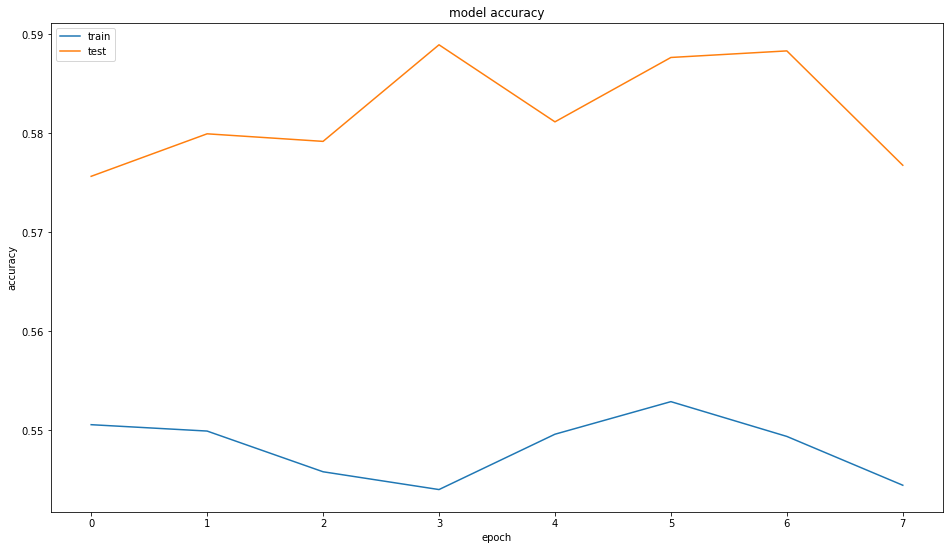

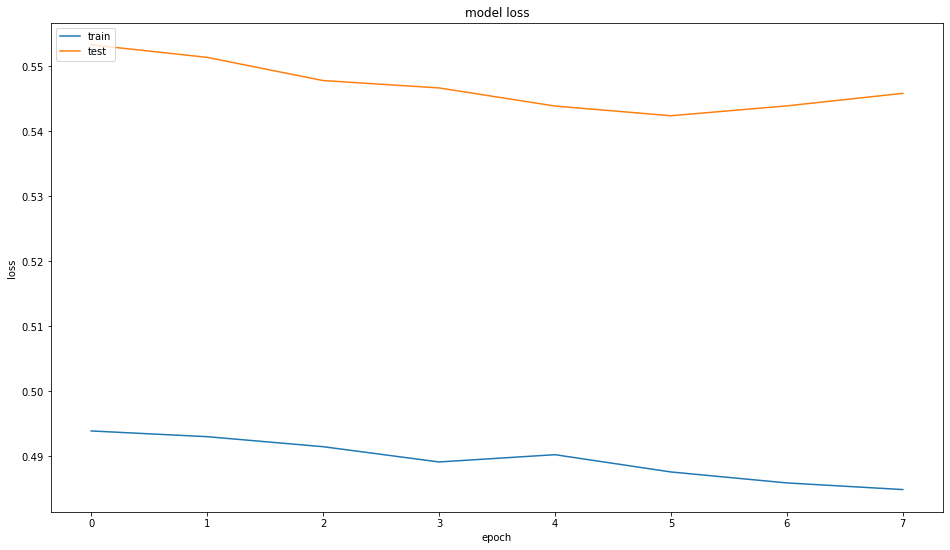

In [25]:
import matplotlib.pyplot as plt
       

plt.figure(1)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Conv        : 0.6086


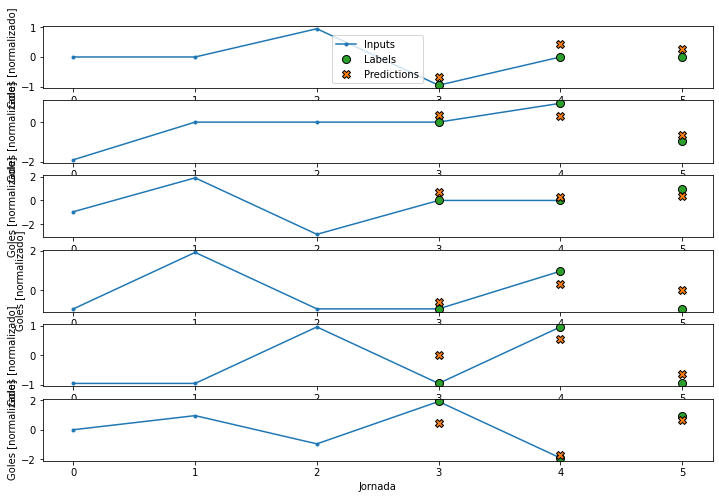

In [27]:
wide_conv_window.plot(conv_model)

In [28]:
OUT_STEPS = 4
multi_window = WindowGenerator(input_width=4,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS, label_columns=['Goles'])

multi_window

Total window size: 8
Input indices: [0 1 2 3]
Label indices: [4 5 6 7]
Label column name(s): ['Goles']

14/14 [==============================] - 1s 19ms/step - loss: 0.9341 - mean_absolute_error: 0.6257


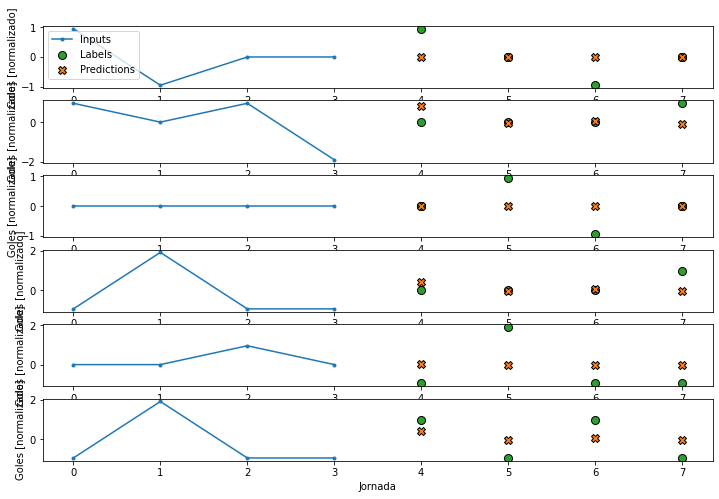

In [29]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

multi_val_performance = {}
multi_performance = {}

history = compile_and_fit(multi_linear_model, multi_window)
IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

14/14 [==============================] - 1s 19ms/step - loss: 0.9132 - mean_absolute_error: 0.6251


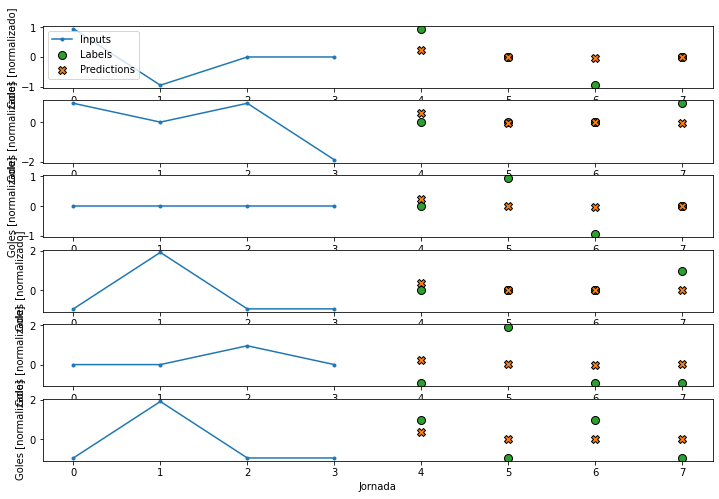

In [30]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)


IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

14/14 [==============================] - 1s 19ms/step - loss: 0.8880 - mean_absolute_error: 0.6335


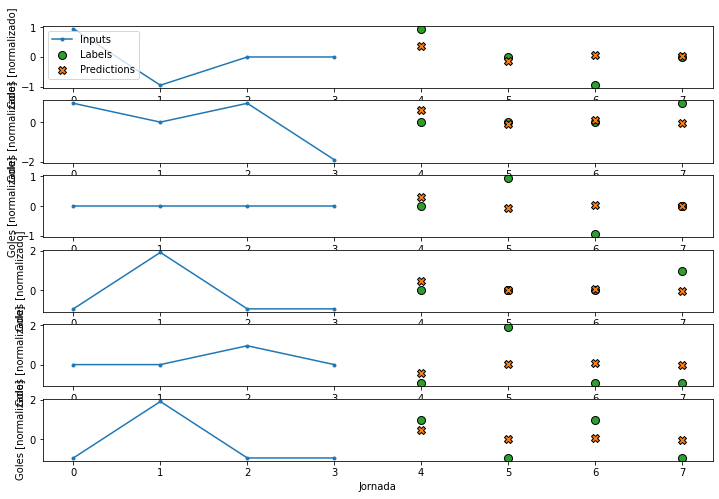

In [31]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

14/14 [==============================] - 1s 19ms/step - loss: 0.8757 - mean_absolute_error: 0.6210


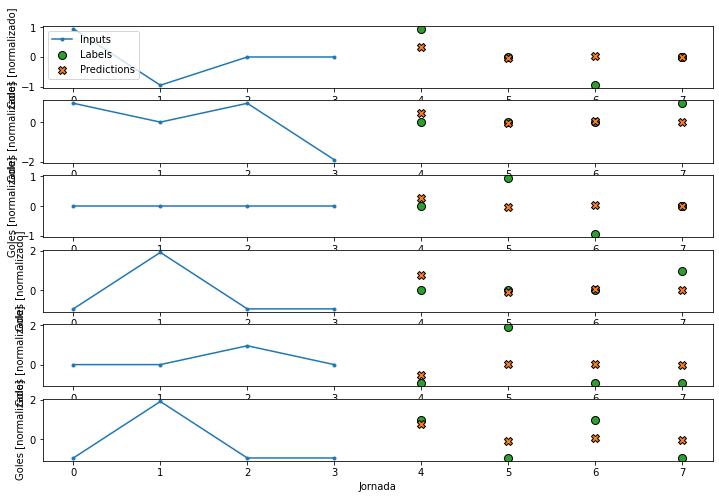

In [32]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

In [33]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [34]:
def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup

In [35]:
prediction, state = feedback_model.warmup(multi_window.example[0])

In [36]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call

14/14 [==============================] - 1s 20ms/step - loss: 0.8818 - mean_absolute_error: 0.6250


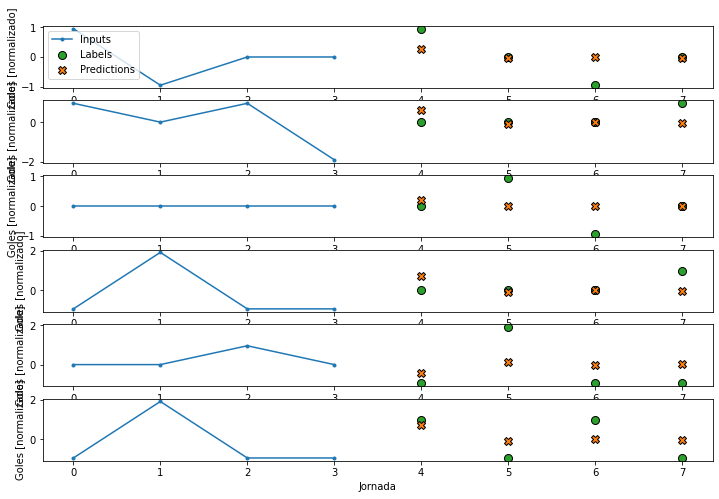

In [37]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [38]:
for name, value in multi_performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')

Linear      : 0.6870
Dense       : 0.7042
Conv        : 0.7113
LSTM        : 0.6986
AR LSTM     : 0.7002
